In [16]:

#Libraries 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Input, Conv2DTranspose
from tensorflow.keras.models import Model


In [17]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [18]:
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


In [19]:
# Split data into unsupervised and supervised sets
unsupervised_images, supervised_images, unsupervised_labels, supervised_labels = train_test_split(train_images, train_labels, test_size=10000, random_state=42)

# Create dictionaries to store data
unsupervised_data = {'images': unsupervised_images[:60000]}
supervised_data = {'images': supervised_images, 'labels': supervised_labels}

# Store data into dictionaries
unsupervised_hozana = unsupervised_data
supervised_hozana = supervised_data

In [20]:
# Normalize pixel values to range between 0 and 1
unsupervised_hozana['images'] = unsupervised_hozana['images'] / 255.0
supervised_hozana['images'] = supervised_hozana['images'] / 255.0

# Step 2: One-hot encode the labels
supervised_hozana['labels'] = to_categorical(supervised_hozana['labels'])

# Step 3: Display the shapes of the datasets
print("Shape of unsupervised images:", unsupervised_hozana['images'].shape)
print("Shape of supervised images:", supervised_hozana['images'].shape)
print("Shape of supervised labels:", supervised_hozana['labels'].shape)


Shape of unsupervised images: (50000, 28, 28)
Shape of supervised images: (10000, 28, 28)
Shape of supervised labels: (10000, 10)


In [21]:
random_seed = 26  
unsupervised_train_hozana, unsupervised_val_hozana = train_test_split(unsupervised_hozana['images'], test_size=3000, random_state=random_seed)

In [22]:
#Discard 7,000 samples randomly from the supervised dataset
supervised_discarded, _ = train_test_split(supervised_hozana['images'], test_size=7000, random_state=random_seed)

In [23]:
#Split the remaining supervised dataset into training, validation, and testing sets
x_train_hozana, x_temp, y_train_hozana, y_temp = train_test_split(supervised_hozana['images'], supervised_hozana['labels'], test_size=3000, random_state=random_seed)
x_val_hozana, x_test_hozana, y_val_hozana, y_test_hozana = train_test_split(x_temp, y_temp, test_size=600, random_state=random_seed)


In [24]:

print("Unsupervised train:", unsupervised_train_hozana.shape)
print("Unsupervised val:", unsupervised_val_hozana.shape)
print("x_train:", x_train_hozana.shape)
print("x_val:", x_val_hozana.shape)
print("x_test:", x_test_hozana.shape)
print("y_train:", y_train_hozana.shape)
print("y_val:", y_val_hozana.shape)
print("y_test:", y_test_hozana.shape)

Unsupervised train: (47000, 28, 28)
Unsupervised val: (3000, 28, 28)
x_train: (7000, 28, 28)
x_val: (2400, 28, 28)
x_test: (600, 28, 28)
y_train: (7000, 10)
y_val: (2400, 10)
y_test: (600, 10)


In [25]:

# CNN model
cnn_v1_model_hozana = Sequential([
    # Convolutional layers
    Conv2D(16, (3, 3), activation='relu', padding='same', strides=2, input_shape=(28, 28, 1)),
    Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
    # Flatten layer
    Flatten(),
    # Fully connected layer
    Dense(100, activation='relu'),
    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model
cnn_v1_model_hozana.compile(optimizer='adam',
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])

# Summary
cnn_v1_model_hozana.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               39300     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41630 (162.62 KB)
Trainable params: 41630 (162.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
cnn_v1_history_hozana = cnn_v1_model_hozana.fit(x_train_hozana.reshape(-1, 28, 28, 1), y_train_hozana,
                                                      epochs=10, batch_size=256,
                                                      validation_data=(x_val_hozana.reshape(-1, 28, 28, 1), y_val_hozana))

Epoch 1/10
28/28 [==============================] - 5s 62ms/step - loss: 1.8475 - accuracy: 0.4474 - val_loss: 1.0397 - val_accuracy: 0.6837
Epoch 2/10
28/28 [==============================] - 2s 71ms/step - loss: 0.8483 - accuracy: 0.7016 - val_loss: 0.6807 - val_accuracy: 0.7600
Epoch 3/10
28/28 [==============================] - 2s 57ms/step - loss: 0.6920 - accuracy: 0.7530 - val_loss: 0.6460 - val_accuracy: 0.7638
Epoch 4/10
28/28 [==============================] - 2s 75ms/step - loss: 0.6278 - accuracy: 0.7711 - val_loss: 0.5755 - val_accuracy: 0.7921
Epoch 5/10
28/28 [==============================] - 1s 51ms/step - loss: 0.5835 - accuracy: 0.7899 - val_loss: 0.5417 - val_accuracy: 0.8100
Epoch 6/10
28/28 [==============================] - 2s 65ms/step - loss: 0.5620 - accuracy: 0.7937 - val_loss: 0.5512 - val_accuracy: 0.7946
Epoch 7/10
28/28 [==============================] - 2s 54ms/step - loss: 0.5450 - accuracy: 0.8011 - val_loss: 0.5058 - val_accuracy: 0.8221
Epoch 8/10
28

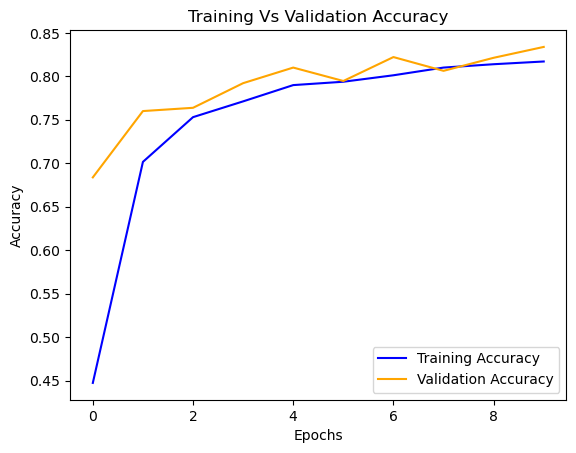

In [27]:
plt.plot(cnn_v1_history_hozana.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(cnn_v1_history_hozana.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend()
plt.show()


In [28]:
# Evaluate the cnn model
test_loss, test_accuracy = cnn_v1_model_hozana.evaluate(x_test_hozana.reshape(-1, 28, 28, 1), y_test_hozana)
print("Test Accuracy:", test_accuracy)


19/19 [==============================] - 1s 9ms/step - loss: 0.4781 - accuracy: 0.8167
Test Accuracy: 0.8166666626930237


19/19 [==============================] - 0s 7ms/step


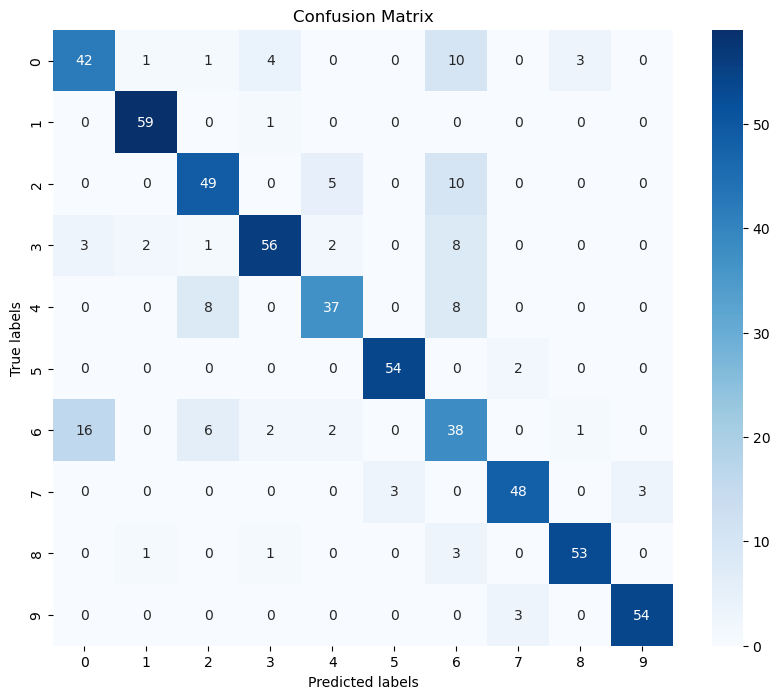

In [29]:
# Predictions on the test dataset
cnn_predictions_hozana = cnn_v1_model_hozana.predict(x_test_hozana.reshape(-1, 28, 28, 1))

# Step 4: Plot the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_hozana, axis=1), np.argmax(cnn_predictions_hozana, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Summary, Epoch, Chart, Test Accuracy, Confusion Matriz 


Overall, the CNN model demostrates a good performance in classifying the images.
The training dataset and validation accuary incrieased over epochs raching training accuracy 83% and validation accuracy 82%. Indicating that the model is learning the patterns in the dataset.
The Test Accuracy is 83.3% which is a good result.
The confusion Matrix: as the TP and TN values are not higher than 56, the evaluation of the model through CM it is showing that the model did not performed very well, I can say it is balanced.

In [30]:
# Random noise
noise_factor = 0.2
tf.random.set_seed(random_seed)
x_train_noisy_hozana = unsupervised_train_hozana + noise_factor * tf.random.normal(shape=unsupervised_train_hozana.shape)
x_val_noisy_hozana = unsupervised_val_hozana + noise_factor * tf.random.normal(shape=unsupervised_val_hozana.shape)

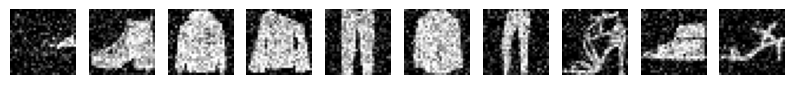

In [31]:
#Clip the values
x_train_noisy_hozana = tf.clip_by_value(x_train_noisy_hozana, clip_value_min=0.0, clip_value_max=1.0)
x_val_noisy_hozana = tf.clip_by_value(x_val_noisy_hozana, clip_value_min=0.0, clip_value_max=1.0)

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_val_noisy_hozana[i], cmap='gray')
    plt.axis('off')
plt.show()


In [32]:
# Input layer
inputs_hozana = Input(shape=(28, 28, 1))

# Encoder Section
e_hozana = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(inputs_hozana)
e_hozana = Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(e_hozana)

# Decoder Section
d_hozana = Conv2DTranspose(8, (3, 3), activation='relu', padding='same', strides=2)(e_hozana)
d_hozana = Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(d_hozana)
d_hozana = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d_hozana)

# Autoencoder Model
autoencoder_hozana = Model(inputs=inputs_hozana, outputs=d_hozana, name='autoencoder_hozana')



In [33]:

# Compile the autoencoder model
autoencoder_hozana.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Display model summary
autoencoder_hozana.summary()


Model: "autoencoder_hozana"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 1)  

In [34]:

# Train and validate the autoencoder model
history_autoencoder_hozana = autoencoder_hozana.fit(x_train_noisy_hozana, unsupervised_train_hozana,
                                                          epochs=10, batch_size=256, shuffle=True,
                                                          validation_data=(x_val_noisy_hozana, unsupervised_val_hozana))

Epoch 1/10
184/184 [==============================] - 110s 569ms/step - loss: 0.0574 - val_loss: 0.0173
Epoch 2/10
184/184 [==============================] - 57s 310ms/step - loss: 0.0149 - val_loss: 0.0138
Epoch 3/10
184/184 [==============================] - 56s 306ms/step - loss: 0.0128 - val_loss: 0.0124
Epoch 4/10
184/184 [==============================] - 62s 337ms/step - loss: 0.0117 - val_loss: 0.0113
Epoch 5/10
184/184 [==============================] - 56s 304ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 6/10
184/184 [==============================] - 55s 297ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 7/10
184/184 [==============================] - 55s 299ms/step - loss: 0.0098 - val_loss: 0.0098
Epoch 8/10
184/184 [==============================] - 54s 292ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 9/10
184/184 [==============================] - 53s 289ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 10/10
184/184 [==============================] - 56s 302ms/step - 

94/94 [==============================] - 2s 15ms/step


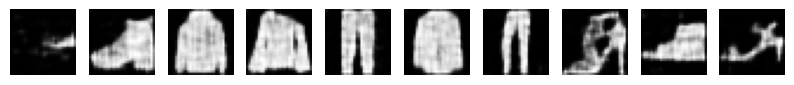

In [35]:
# Predictions on the validation dataset
autoencoder_predictions_hozana = autoencoder_hozana.predict(x_val_noisy_hozana)

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(np.mean(autoencoder_predictions_hozana[i], axis=-1), cmap='gray')
    plt.axis('off')
plt.show()

In [36]:

# CNN model 
cnn_v2_hozana = Sequential([autoencoder_hozana.layers[0], 
                            autoencoder_hozana.layers[1], 
                            Flatten(), 
                            Dense(100, activation='relu'),
                            Dense(10, activation='softmax')
])

# Compile the model
cnn_v2_hozana.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

# Summary
cnn_v2_hozana.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               313700    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 314870 (1.20 MB)
Trainable params: 314870 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
cnn_v2_history_hozana = cnn_v2_hozana.fit(x_train_hozana, y_train_hozana,
                                                epochs=10, batch_size=256,
                                                validation_data=(x_val_hozana, y_val_hozana))


Epoch 1/10
28/28 [==============================] - 4s 65ms/step - loss: 1.0479 - accuracy: 0.6306 - val_loss: 0.6397 - val_accuracy: 0.7733
Epoch 2/10
28/28 [==============================] - 2s 80ms/step - loss: 0.6274 - accuracy: 0.7784 - val_loss: 0.6788 - val_accuracy: 0.7300
Epoch 3/10
28/28 [==============================] - 2s 56ms/step - loss: 0.5930 - accuracy: 0.7850 - val_loss: 0.5188 - val_accuracy: 0.8192
Epoch 4/10
28/28 [==============================] - 2s 78ms/step - loss: 0.5233 - accuracy: 0.8147 - val_loss: 0.5344 - val_accuracy: 0.8125
Epoch 5/10
28/28 [==============================] - 2s 79ms/step - loss: 0.5341 - accuracy: 0.8053 - val_loss: 0.4716 - val_accuracy: 0.8408
Epoch 6/10
28/28 [==============================] - 3s 102ms/step - loss: 0.4696 - accuracy: 0.8343 - val_loss: 0.4549 - val_accuracy: 0.8483
Epoch 7/10
28/28 [==============================] - 3s 93ms/step - loss: 0.4468 - accuracy: 0.8461 - val_loss: 0.5005 - val_accuracy: 0.8192
Epoch 8/10
2

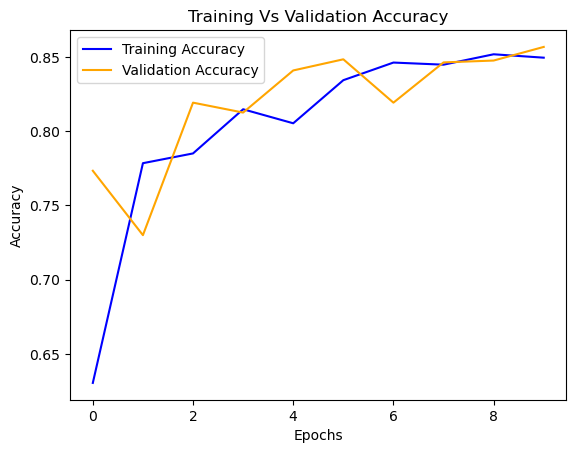

In [38]:
plt.plot(cnn_v2_history_hozana.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(cnn_v2_history_hozana.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend()
plt.show()

In [39]:
test_loss, test_accuracy = cnn_v2_hozana.evaluate(x_test_hozana, y_test_hozana)
print("Test Accuracy:", test_accuracy)

19/19 [==============================] - 0s 9ms/step - loss: 0.4168 - accuracy: 0.8483
Test Accuracy: 0.8483333587646484


19/19 [==============================] - 0s 9ms/step


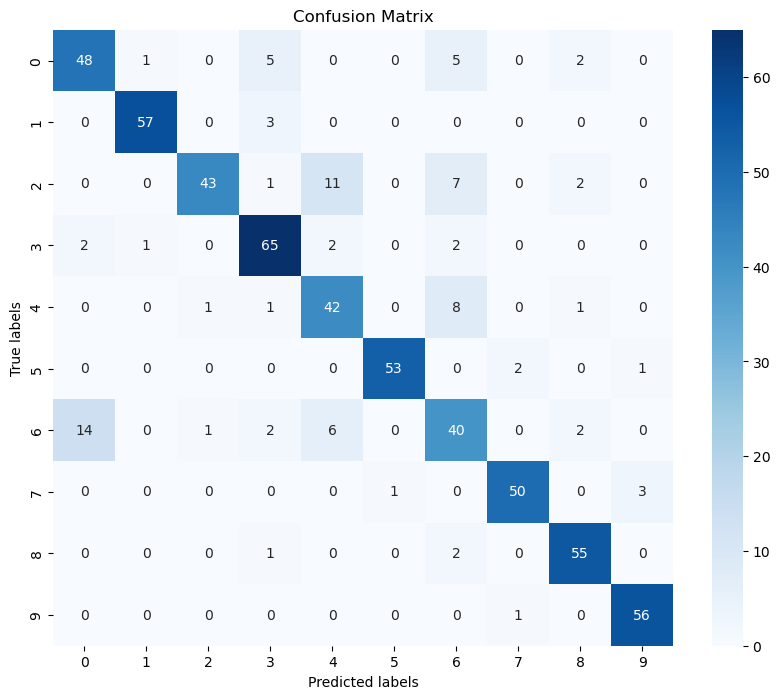

In [40]:

# Step 3: Create predictions on the test dataset
cnn_predictions_hozana = cnn_v2_hozana.predict(x_test_hozana)

# Step 4: Plot the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_hozana, axis=1), np.argmax(cnn_predictions_hozana, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

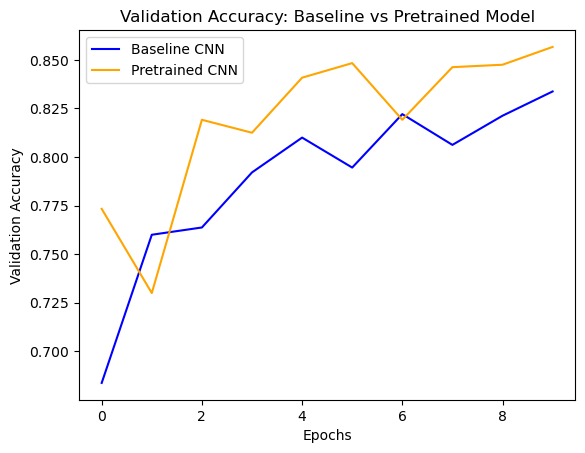

In [41]:
# Plot Validation Accuracy of Baseline vs Pretrained Model
plt.plot(cnn_v1_history_hozana.history['val_accuracy'], label='Baseline CNN', color='blue')
plt.plot(cnn_v2_history_hozana.history['val_accuracy'], label='Pretrained CNN', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy: Baseline vs Pretrained Model')
plt.legend()
plt.show()


Conclusion : 